# Support Vector Machines (SVMs) *Wine dataset*

### 1.Preprocess the data.
### 2.Train an SVM classifier.
### 3.Evaluate the model.
### 4.Visualize the results.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

In [2]:
wine=load_wine()

## **Preprocess** the data

In [3]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
df=pd.DataFrame(data=wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
df['target']=wine.target
df.head(-1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2


In [10]:
df['Wine_class']=df.target.apply(lambda x: wine.target_names[x])
df.head(-1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,Wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2,class_2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,class_2


In [11]:
x=wine.data
y=df.target

In [12]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

## **Train** as an **SVM** classifier.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
len(X_train),len(X_test)

(124, 54)

In [16]:
X_train

array([[1.349e+01, 3.590e+00, 2.190e+00, ..., 8.100e-01, 1.820e+00,
        5.800e+02],
       [1.251e+01, 1.730e+00, 1.980e+00, ..., 1.040e+00, 3.570e+00,
        6.720e+02],
       [1.233e+01, 9.900e-01, 1.950e+00, ..., 1.060e+00, 2.310e+00,
        7.500e+02],
       ...,
       [1.438e+01, 1.870e+00, 2.380e+00, ..., 1.200e+00, 3.000e+00,
        1.547e+03],
       [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
        4.950e+02],
       [1.234e+01, 2.450e+00, 2.460e+00, ..., 8.000e-01, 3.380e+00,
        4.380e+02]])

In [17]:
from sklearn.svm import SVC

In [18]:
model=SVC(kernel='linear')

In [19]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [20]:
model.score(X_test,y_test)

0.9814814814814815

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

## Evaluation

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)  

Accuracy: 0.9814814814814815
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Confusion Matrix:
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


## Prediction

#### Prediction in the form:-
##### Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline

In [23]:
model.predict([[13.2, 1.78, 2.14, 11.2, 100, 2.65, 2.76, 0.26, 1.65, 3.4, 1.05, 3.33, 820]])

array([0])

In [24]:
new_sample = [[13.2, 1.78, 2.14, 11.2, 100, 2.65, 2.76, 0.26, 1.65, 3.4, 1.05, 3.33, 820]]
predicted_class = model.predict(new_sample)
print(f"Predicted class: {wine.target_names[predicted_class[0]]}")

Predicted class: class_0


In [25]:
new_sample1=[[3.86,1.51	,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0]]
predict_wine=model.predict(new_sample1)
print("Predicted Class Of Wine:",wine.target_names[predict_wine[0]])

Predicted Class Of Wine: class_1


In [26]:
x=model.predict(X_train)
for i in x:
    print("Predicted Class Of Wine:",wine.target_names[i])

Predicted Class Of Wine: class_2
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_2
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_2
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_2
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_2
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_2
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_2
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_1
Predicted Class Of Wine: class_0
Predicted Class Of Wine: class_0
Predicted 

## Visualization

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


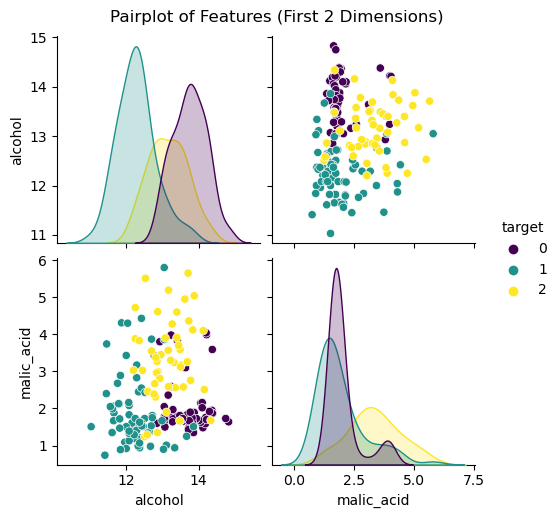

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot of features
sns.pairplot(df, hue='target', vars=wine.feature_names[:2], palette='viridis')
plt.suptitle('Pairplot of Features (First 2 Dimensions)', y=1.02)
plt.show()


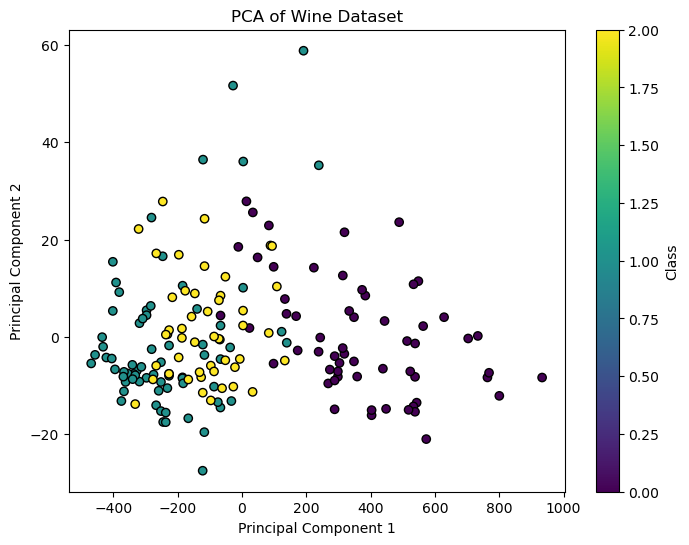

In [28]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[wine.feature_names])

# Plot PCA components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['target'], cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.colorbar(scatter, label='Class')
plt.show()
